In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy import signal


1. chill lenght is 41999
2. pushups lenght is 22299
3. squats lenght is 32199
4. jumps lenght is 22699


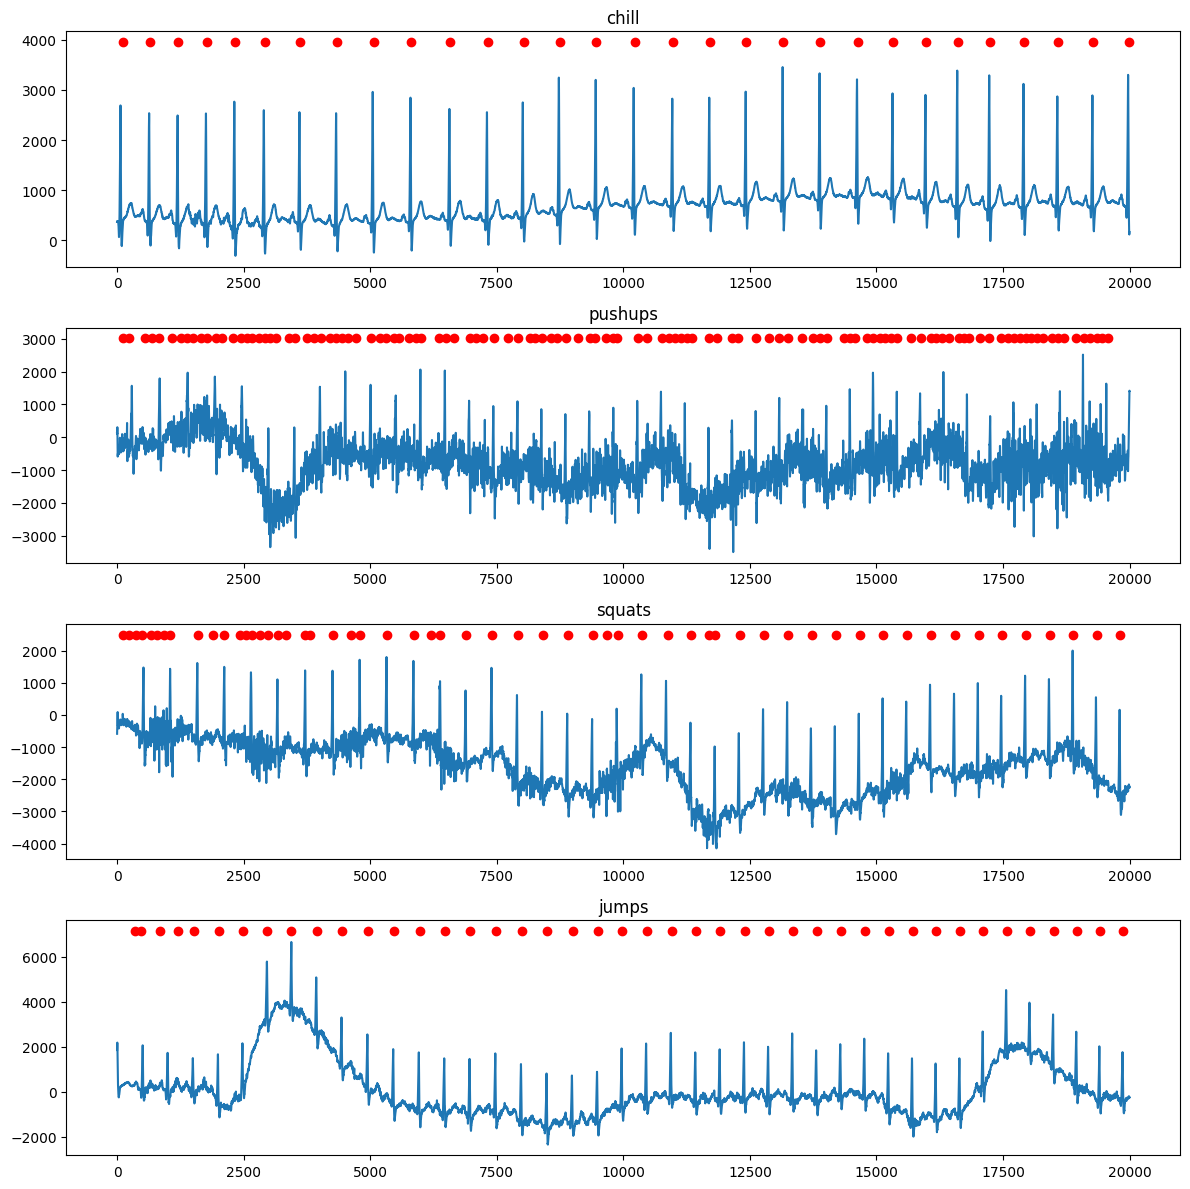

In [9]:
persons = ['JP', 'WR', 'AS', 'JS']

# Read data
chill = pd.read_csv('EAM Projekt\JP\ekg_spoczynek.lvm', sep='\t', decimal=',').iloc[:, 1].values
pushups = pd.read_csv('EAM Projekt\JP\ekg_pompki.lvm', sep='\t', decimal=',').iloc[:, 1].values
squats = pd.read_csv('EAM Projekt\JP\ekg_przysiady.lvm', sep='\t', decimal=',').iloc[:, 1].values
jumps = pd.read_csv('EAM Projekt\JP\ekg_podskoki.lvm', sep='\t', decimal=',').iloc[:, 1].values

data = {'chill':chill, 'pushups':pushups, 'squats':squats, 'jumps':jumps}

for i, (key, value) in enumerate(data.items()):
    print(f'{i+1}. {key} lenght is {len(value)}')

fig, axs = plt.subplots(4, 1, figsize=(12, 12))

plot_window = (0, 20000)

# Iterate over the key-value pairs in the data dictionary
for i, (key, value) in enumerate(data.items()):
    
    ekg = value[plot_window[0]:plot_window[1]]
    
    signals, info = nk.ecg_process(ekg, sampling_rate=360, method='pantompkins1985')
    mask = (info['ECG_R_Peaks'] > plot_window[0]) & (info['ECG_R_Peaks'] < plot_window[1]) 
    QRS = info['ECG_R_Peaks'][mask]

    axs[i].scatter(QRS, (max(ekg)+500)*np.ones(len(QRS)), color='r')
    axs[i].plot(ekg)
    axs[i].set_title(key)  # Set subplot title to the key

plt.tight_layout()  
plt.show()


1. chill lenght is 41999
2. pushups lenght is 22299
3. squats lenght is 32199
4. jumps lenght is 22699
1. chill lenght is 22899
2. pushups lenght is 27499
3. squats lenght is 54599
4. jumps lenght is 23999
1. chill lenght is 20399
2. pushups lenght is 15599
3. squats lenght is 21899
4. jumps lenght is 17699
1. chill lenght is 31599
2. pushups lenght is 18899
3. squats lenght is 29499
4. jumps lenght is 19699


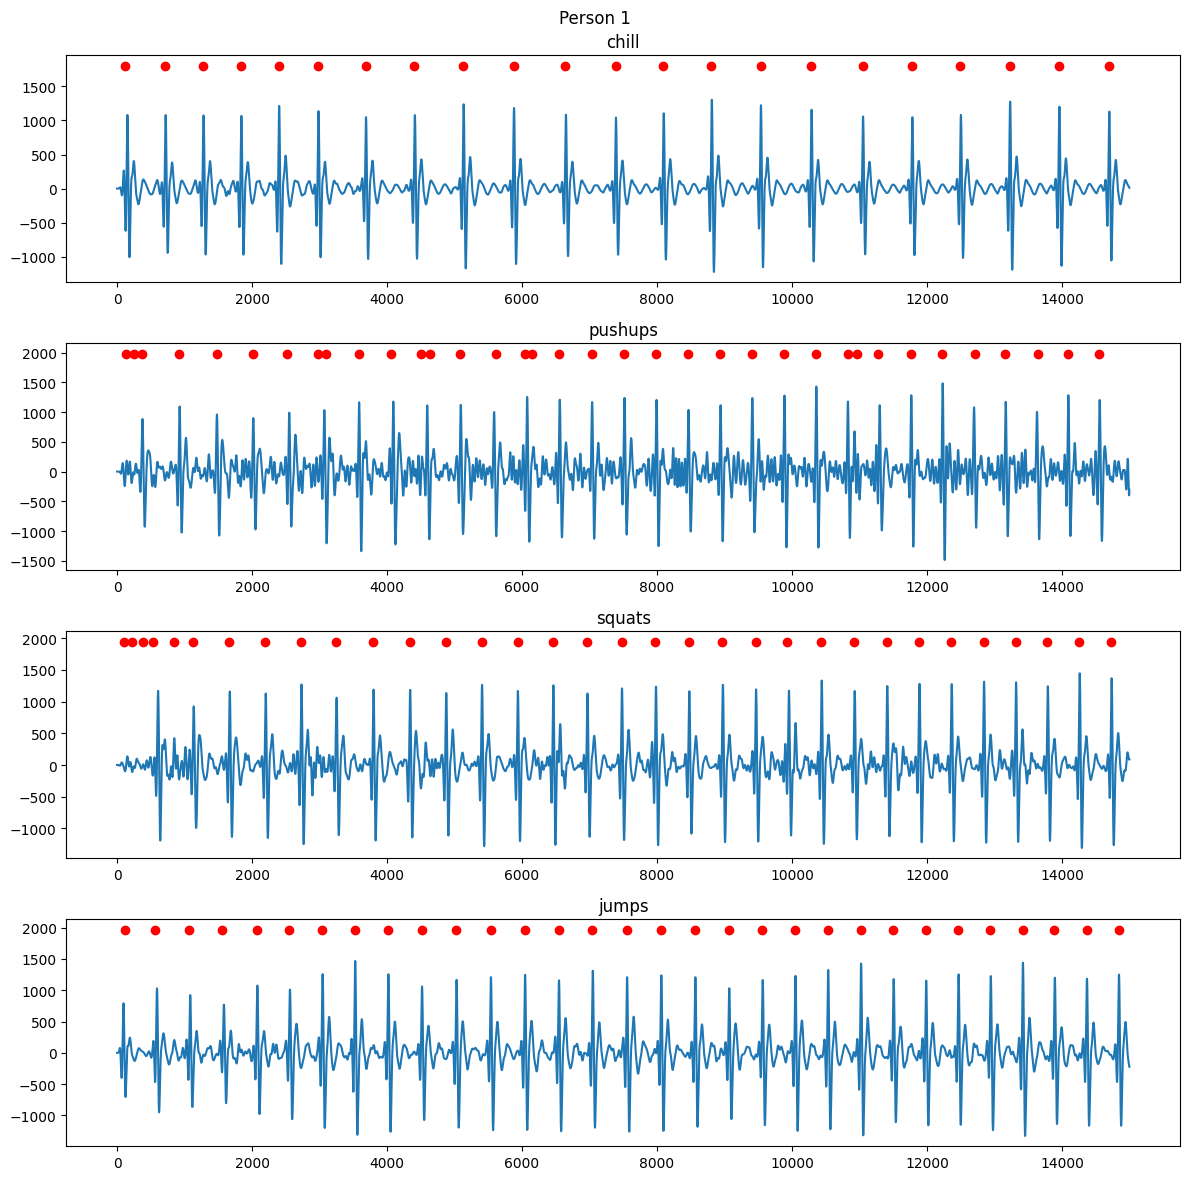

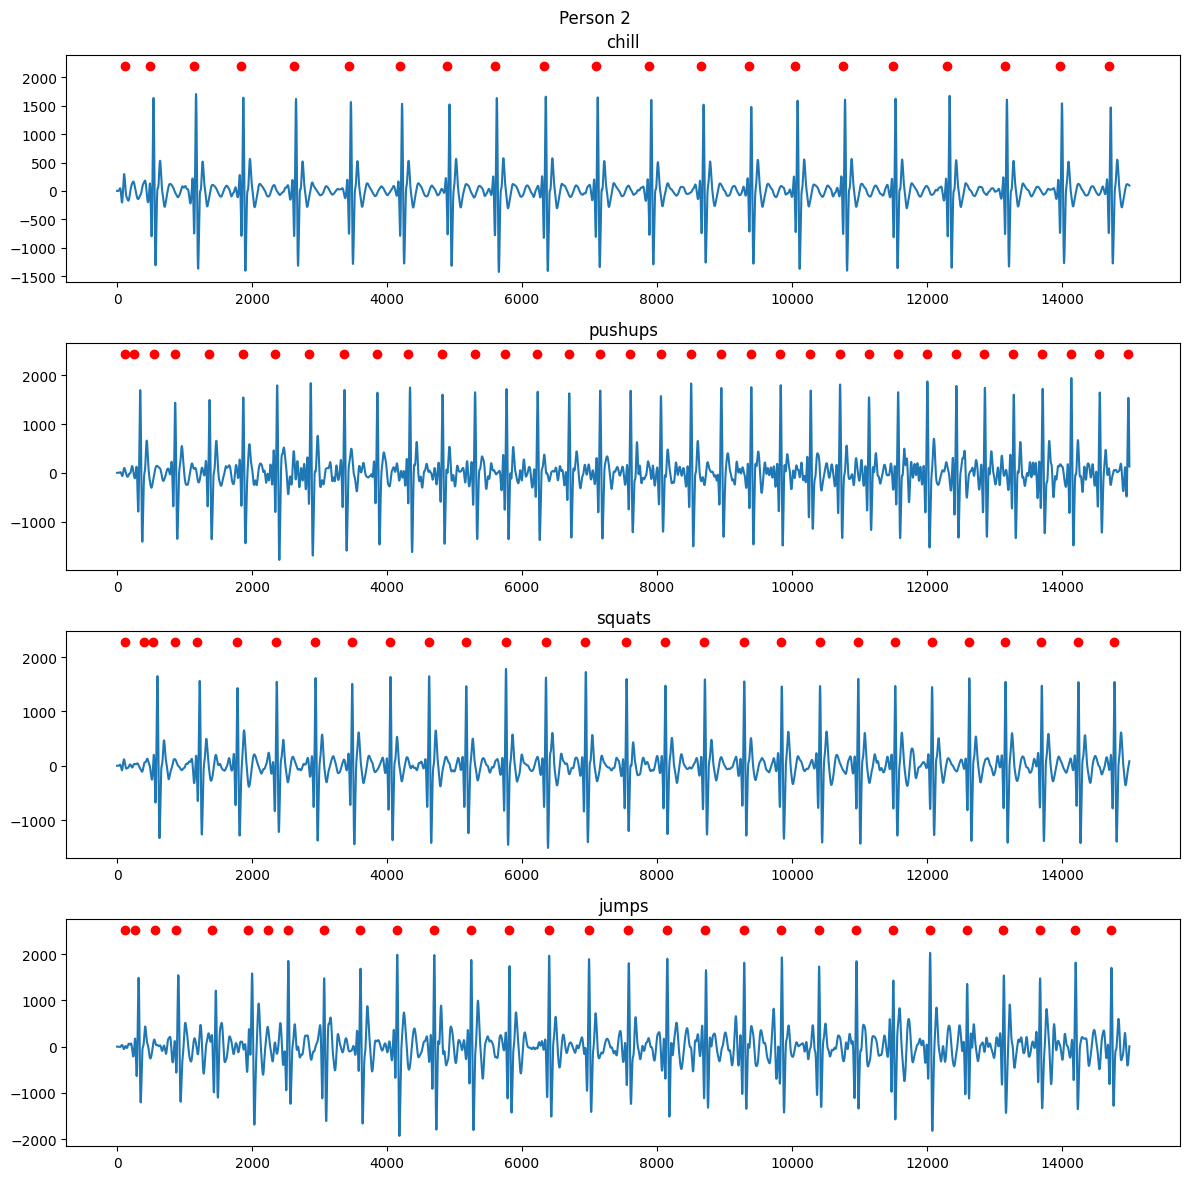

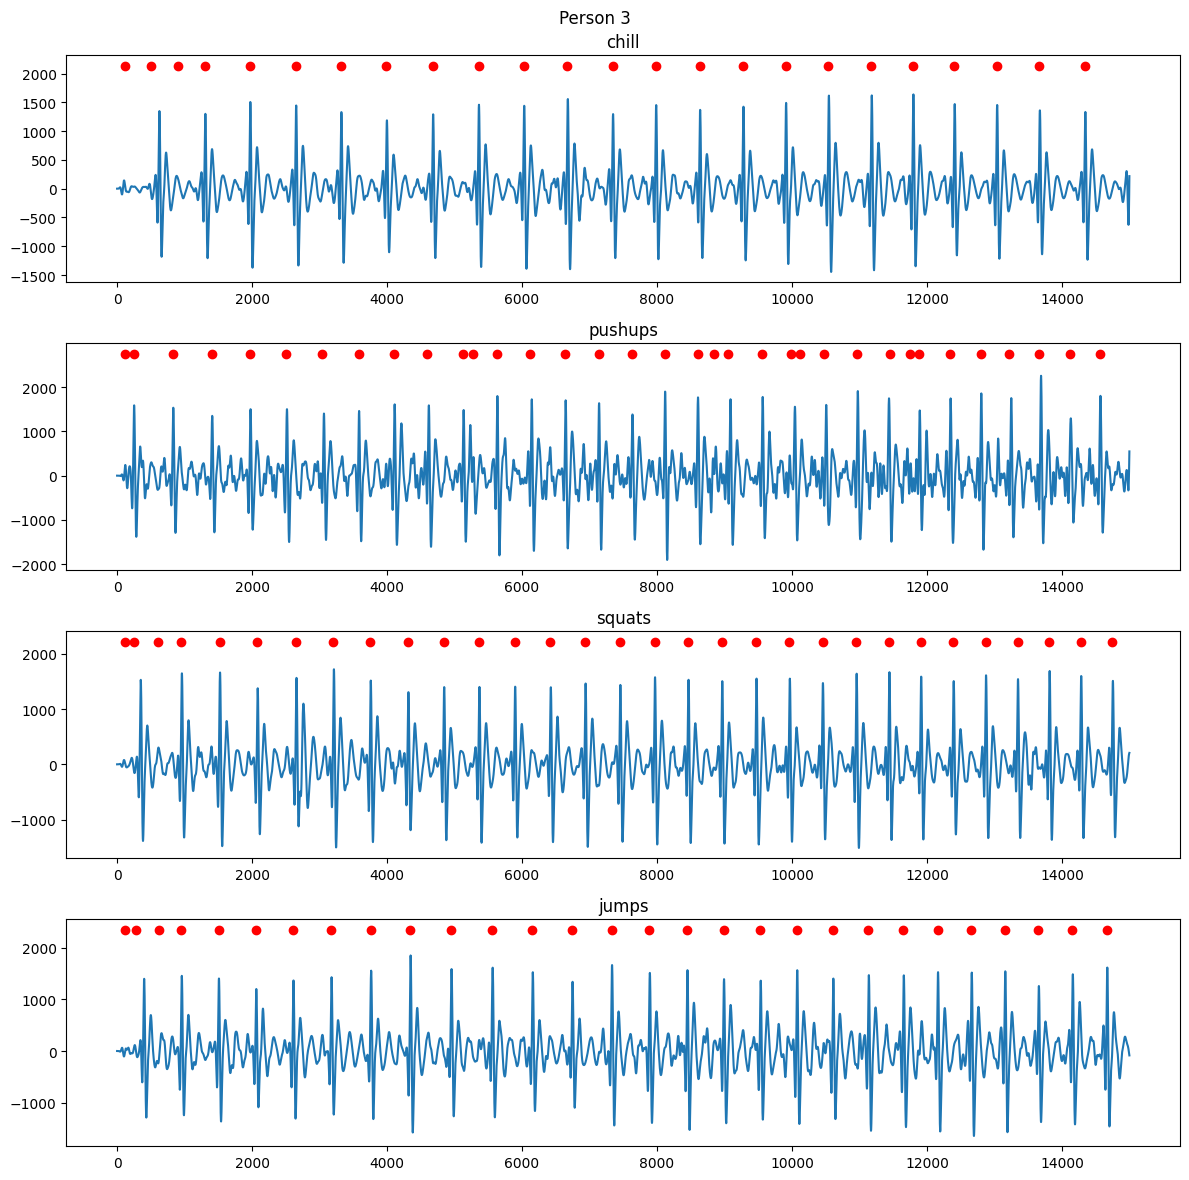

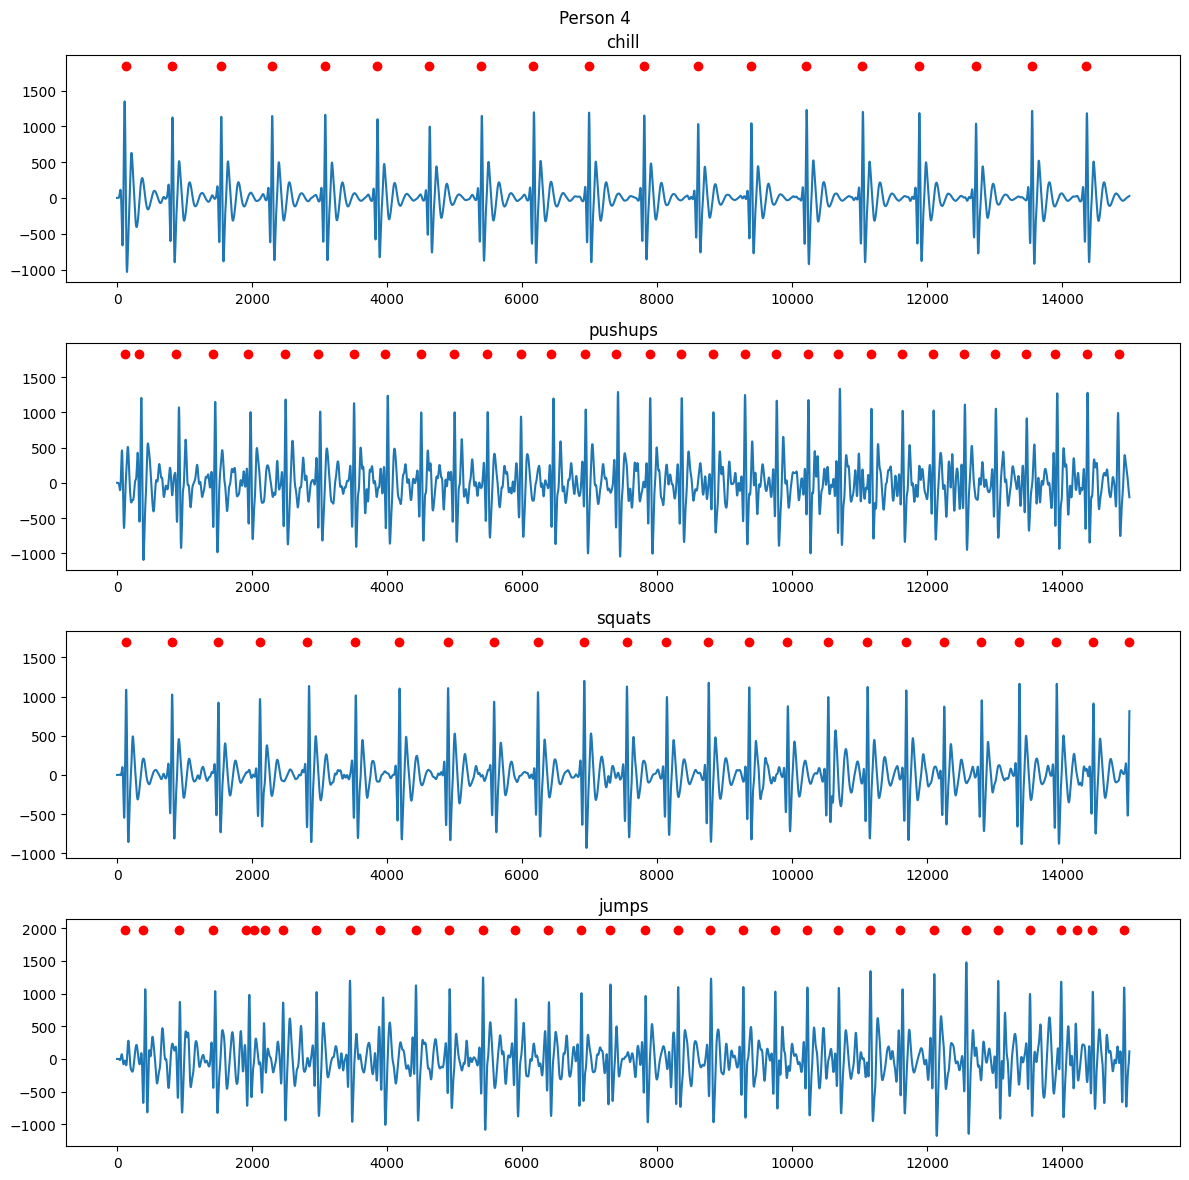

In [10]:
persons = ['JP', 'WR', 'AS', 'JS']

for j, name in enumerate(persons):
    # Read data
    chill = pd.read_csv(f'EAM Projekt\{name}\ekg_spoczynek.lvm', sep='\t', decimal=',').iloc[:, 1].values
    pushups = pd.read_csv(f'EAM Projekt\{name}\ekg_pompki.lvm', sep='\t', decimal=',').iloc[:, 1].values
    squats = pd.read_csv(f'EAM Projekt\{name}\ekg_przysiady.lvm', sep='\t', decimal=',').iloc[:, 1].values
    jumps = pd.read_csv(f'EAM Projekt\{name}\ekg_podskoki.lvm', sep='\t', decimal=',').iloc[:, 1].values

    data = {'chill':chill, 'pushups':pushups, 'squats':squats, 'jumps':jumps}

    for i, (key, value) in enumerate(data.items()):
        print(f'{i+1}. {key} lenght is {len(value)}')

    fig, axs = plt.subplots(4, 1, figsize=(12, 12))

    plot_window = (0, 15000)

    # Iterate over the key-value pairs in the data dictionary
    for i, (key, value) in enumerate(data.items()):
        
        ekg = value[plot_window[0]:plot_window[1]]

        
        # Filtering only frequencies from band (2, 8) Hz
        # Low pass filter
        sos = signal.butter(10, 8, 'lp', fs=360, output='sos')
        ekg = signal.sosfilt(sos, ekg)

        # High pass filter
        sos = signal.butter(10, 2, 'hp', fs=360, output='sos')
        ekg = signal.sosfilt(sos, ekg)
        
        signals, info = nk.ecg_process(ekg, sampling_rate=360, method='pantompkins1985')
        mask = (info['ECG_R_Peaks'] > plot_window[0]) & (info['ECG_R_Peaks'] < plot_window[1]) 
        QRS = info['ECG_R_Peaks'][mask]
        fig.suptitle(f"Person {j+1}")
        axs[i].scatter(QRS, (max(ekg)+500)*np.ones(len(QRS)), color='r')
        axs[i].plot(ekg)
        axs[i].set_title(key)  # Set subplot title to the key

        plt.tight_layout()  
        plt.savefig(f'Filtered data without QRS detections, person {j+1}')

plt.show()


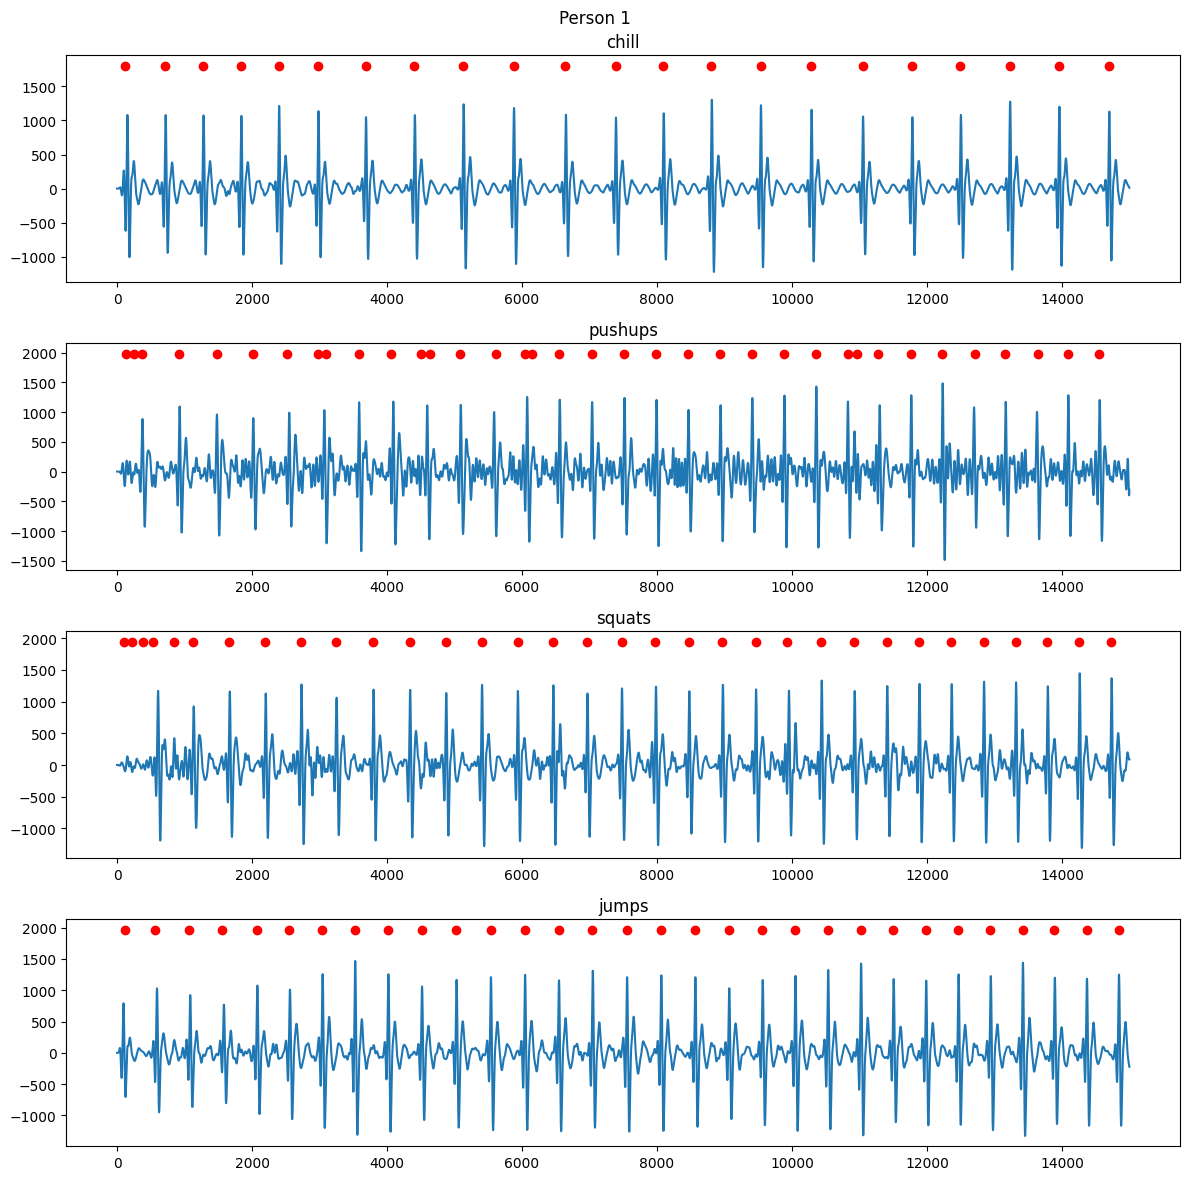

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

plot_window = (0, 15000)


persons = ['JP', 'WR', 'AS', 'JS']

for j, name in enumerate(persons):
    # Read data
    chill = pd.read_csv(f'EAM Projekt\{name}\ekg_spoczynek.lvm', sep='\t', decimal=',').iloc[:, 1].values
    pushups = pd.read_csv(f'EAM Projekt\{name}\ekg_pompki.lvm', sep='\t', decimal=',').iloc[:, 1].values
    squats = pd.read_csv(f'EAM Projekt\{name}\ekg_przysiady.lvm', sep='\t', decimal=',').iloc[:, 1].values
    jumps = pd.read_csv(f'EAM Projekt\{name}\ekg_podskoki.lvm', sep='\t', decimal=',').iloc[:, 1].values

    data = {'chill':chill, 'pushups':pushups, 'squats':squats, 'jumps':jumps}

    # print(len(ekg))
    # Iterate over the key-value pairs in the data dictionary
    for i, (key, value) in enumerate(data.items()):
        
        ekg = value[plot_window[0]:plot_window[1]]

        # Filtering only frequencies from band (2, 8) Hz
        # Low pass filter
        sos = signal.butter(10, 8, 'lp', fs=360, output='sos')
        ekg = signal.sosfilt(sos, ekg)

        # High pass filter
        sos = signal.butter(10, 2, 'hp', fs=360, output='sos')
        ekg = signal.sosfilt(sos, ekg)

        # Calculate QRS times using pan&tompkins
        signals, info = nk.ecg_process(ekg, sampling_rate=360, method='pantompkins1985')

        # Extract only QRS from given window
        mask = (info['ECG_R_Peaks'] > plot_window[0]) & (info['ECG_R_Peaks'] < plot_window[1]) 
        QRS = info['ECG_R_Peaks'][mask]

        # Plot the data
        fig.suptitle(f"Person {j+1}")
        axs[i].scatter(QRS, (max(ekg)+500)*np.ones(len(QRS)), color='r')
        axs[i].plot(ekg)
        axs[i].set_title(key)
        plt.savefig(f'Filtered data without QRS detections, person {j+1}')

        plt.tight_layout()
        
    plt.show()
